## Package init

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
%matplotlib inline

## Data Pre-processing

In [2]:
import sys
sys.path.append('../')

from config.main_config import data_dir, filter_columns, model_dir

input_df = pd.read_csv(data_dir + '/input_data.csv')
input_df.head()

request_id           request_timestamp   latitude   longitude  \
0  1.318644e+19  2022-04-20 04:04:39.134995  19.291656  102.401686   
1  1.318644e+19  2022-04-20 04:04:39.134995  19.291656  102.401686   
2  1.318644e+19  2022-04-25 16:36:06.419041 -37.381351 -135.864581   
3  1.318644e+19  2022-04-25 16:36:06.419041 -37.381351 -135.864581   
4  8.410907e+18  2022-04-20 02:04:05.195647 -73.764421 -112.937925   

   document_photo_brightness_percent  is_photo_in_a_photo_selfie  \
0                                 64                        True   
1                                 64                        True   
2                                 65                        True   
3                                 65                        True   
4                                 96                        True   

   document_matches_selfie_percent    s3_path_to_selfie_photo  \
0                               68  s3://data-bucket/same.txt   
1                               68  s3://data-bucket/same.txt   
2                               28   s3://data-bucket/fly.odp   
3                               28   s3://data-bucket/fly.odp   
4                               16  s3://data-bucket/room.key   

           s3_path_to_document_photo                   timestamp  agent_id  \
0    s3://data-bucket/religious.flac  2022-05-10 22:11:22.160731      4216   
1    s3://data-bucket/religious.flac  2022-06-02 14:59:43.511002      6763   
2  s3://data-bucket/professional.odt  2022-05-10 22:11:22.160731      4216   
3  s3://data-bucket/professional.odt  2022-06-02 14:59:43.511002      6763   
4           s3://data-bucket/set.csv  2022-05-09 20:51:24.693144      7194   

   is_fraud_request  
0             False  
1              True  
2             False  
3              True  
4             False

In [32]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   document_photo_brightness_percent  4000 non-null   int64  
 1   is_photo_in_a_photo_selfie         4000 non-null   bool   
 2   document_matches_selfie_percent    4000 non-null   int64  
 3   is_fraud_request                   4000 non-null   bool   
 4   latitude                           4000 non-null   float64
 5   longitude                          4000 non-null   float64
 6   is_photo_in_a_photo_selfie_cat     4000 non-null   int64  
 7   is_fraud_request_cat               4000 non-null   int64  
dtypes: bool(2), float64(2), int64(4)
memory usage: 195.4 KB


In [3]:
input_df = input_df[filter_columns]
input_df.head()

document_photo_brightness_percent  is_photo_in_a_photo_selfie  \
0                                 64                        True   
1                                 64                        True   
2                                 65                        True   
3                                 65                        True   
4                                 96                        True   

   document_matches_selfie_percent  is_fraud_request   latitude   longitude  
0                               68             False  19.291656  102.401686  
1                               68              True  19.291656  102.401686  
2                               28             False -37.381351 -135.864581  
3                               28              True -37.381351 -135.864581  
4                               16             False -73.764421 -112.937925

## Feature Generation

In [4]:
input_df["is_photo_in_a_photo_selfie_cat"] = input_df["is_photo_in_a_photo_selfie"].astype(int)
input_df["is_fraud_request_cat"] = input_df["is_fraud_request"].astype(int)

In [5]:
input_df.head()

document_photo_brightness_percent  is_photo_in_a_photo_selfie  \
0                                 64                        True   
1                                 64                        True   
2                                 65                        True   
3                                 65                        True   
4                                 96                        True   

   document_matches_selfie_percent  is_fraud_request   latitude   longitude  \
0                               68             False  19.291656  102.401686   
1                               68              True  19.291656  102.401686   
2                               28             False -37.381351 -135.864581   
3                               28              True -37.381351 -135.864581   
4                               16             False -73.764421 -112.937925   

   is_photo_in_a_photo_selfie_cat  is_fraud_request_cat  
0                               1                     0  
1                               1                     1  
2                               1                     0  
3                               1                     1  
4                               1                     0

In [9]:
model_input = input_df[['document_photo_brightness_percent', 'is_photo_in_a_photo_selfie_cat', 'document_matches_selfie_percent', 'is_fraud_request_cat', 'latitude', 'longitude']]

model_input.head()

document_photo_brightness_percent  is_photo_in_a_photo_selfie_cat  \
0                                 64                               1   
1                                 64                               1   
2                                 65                               1   
3                                 65                               1   
4                                 96                               1   

   document_matches_selfie_percent  is_fraud_request_cat   latitude  \
0                               68                     0  19.291656   
1                               68                     1  19.291656   
2                               28                     0 -37.381351   
3                               28                     1 -37.381351   
4                               16                     0 -73.764421   

    longitude  
0  102.401686  
1  102.401686  
2 -135.864581  
3 -135.864581  
4 -112.937925

<AxesSubplot:xlabel='is_photo_in_a_photo_selfie_cat', ylabel='count'>

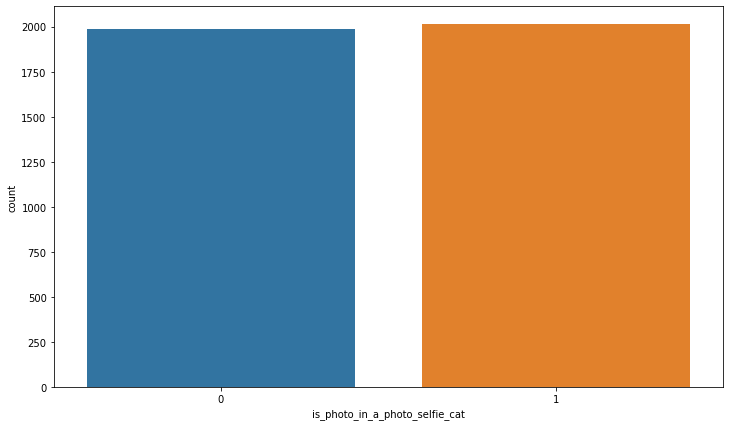

In [10]:
plt.figure(figsize=(12, 7))

sns.countplot(x='is_photo_in_a_photo_selfie_cat',data=model_input)

<AxesSubplot:xlabel='is_fraud_request_cat', ylabel='count'>

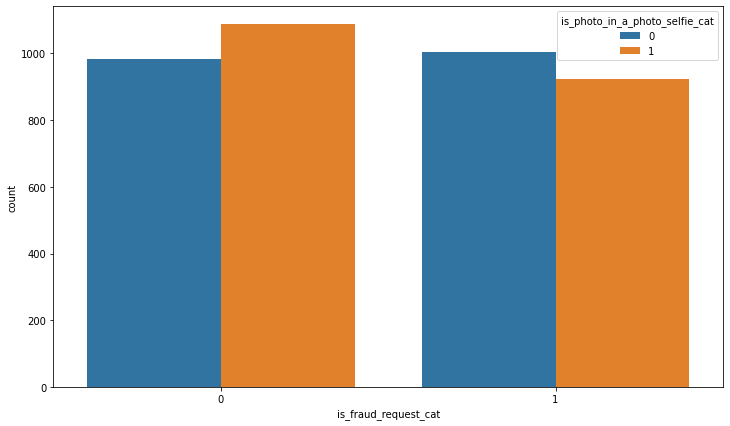

In [11]:
plt.figure(figsize=(12, 7))
sns.countplot(x='is_fraud_request_cat',hue='is_photo_in_a_photo_selfie_cat',data=model_input)

<AxesSubplot:xlabel='is_fraud_request_cat', ylabel='document_photo_brightness_percent'>

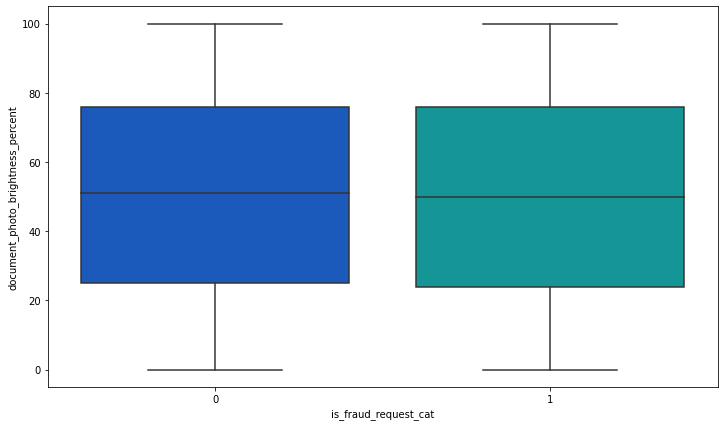

In [12]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='is_fraud_request_cat',y='document_photo_brightness_percent',data=input_df,palette='winter')

<AxesSubplot:xlabel='is_fraud_request_cat', ylabel='document_matches_selfie_percent'>

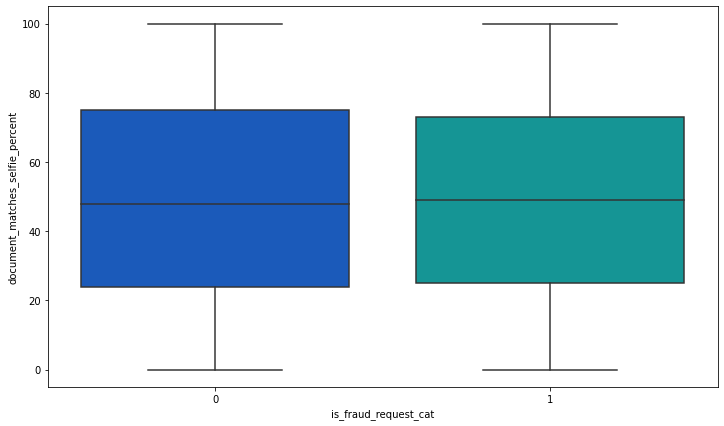

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='is_fraud_request_cat',y='document_matches_selfie_percent',data=input_df,palette='winter')

## LogisticRegression Prediction

In [77]:
y_data = model_input['is_fraud_request_cat']

x_data = model_input.drop('is_fraud_request_cat', axis = 1)

In [78]:
from sklearn.model_selection import train_test_split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.2)

In [79]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_training_data, y_training_data)

LogisticRegression()

In [80]:
x_test_data

document_photo_brightness_percent  is_photo_in_a_photo_selfie_cat  \
1850                                 48                               0   
73                                   66                               0   
1321                                 72                               0   
3918                                 17                               0   
2573                                 69                               0   
...                                 ...                             ...   
92                                    5                               0   
2909                                 96                               0   
3173                                 14                               1   
1982                                 96                               0   
3893                                 77                               1   

      document_matches_selfie_percent   latitude   longitude  
1850                                1  82.017158   88.134538  
73                                 27  41.538372  150.568346  
1321                               57   5.692907 -156.838782  
3918                               94  80.492964  -31.454673  
2573                               81   5.477790  141.192636  
...                               ...        ...         ...  
92                                 98  -5.986269 -143.631467  
2909                                3  57.878419  127.829473  
3173                               97 -51.412763  -27.503761  
1982                               17  18.857106  107.658099  
3893                               60 -57.943885  -22.497619  

[800 rows x 5 columns]

In [65]:
predictions = model.predict(x_test_data)

In [66]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [81]:
predictions_t = model.predict_proba(x_test_data)[:,1]

In [82]:
predictions_t

array([0.53301346, 0.52396623, 0.49684171, 0.50745852, 0.50659297,
       0.49961387, 0.5146761 , 0.47313346, 0.45964929, 0.51620307,
       0.51483179, 0.463862  , 0.46742008, 0.46169928, 0.47022511,
       0.45804772, 0.4738717 , 0.45114328, 0.44523459, 0.52330909,
       0.5146129 , 0.46801779, 0.51535692, 0.52843442, 0.45474216,
       0.49920137, 0.45093999, 0.5186423 , 0.4998933 , 0.51143178,
       0.46377651, 0.49272633, 0.52044696, 0.45300873, 0.50163313,
       0.43789265, 0.50101084, 0.45874779, 0.4618699 , 0.52588046,
       0.50412987, 0.44097482, 0.49492721, 0.52438979, 0.50661831,
       0.51117419, 0.47374478, 0.51176719, 0.47117012, 0.51147118,
       0.46468532, 0.50875152, 0.45312439, 0.43992847, 0.45951459,
       0.47470958, 0.4441841 , 0.46188401, 0.53048146, 0.51332787,
       0.46493571, 0.47524281, 0.51566992, 0.49788564, 0.45804271,
       0.50003652, 0.46694266, 0.45964929, 0.48214957, 0.4683526 ,
       0.45244242, 0.45801403, 0.51609057, 0.45236938, 0.44601

In [83]:
from sklearn.metrics import classification_report
classification_report(y_test_data, predictions)

import pprint

pprint.pprint(classification_report(y_test_data, predictions))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.54      0.69      0.60       422\n'
 '           1       0.50      0.35      0.41       378\n'
 '\n'
 '    accuracy                           0.53       800\n'
 '   macro avg       0.52      0.52      0.51       800\n'
 'weighted avg       0.52      0.53      0.51       800\n')


In [84]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_data, predictions))

[[290 132]
 [247 131]]


In [85]:
import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(model_dir + filename, 'wb'))

In [86]:
# load the model from disk
loaded_model = pickle.load(open(model_dir + filename, 'rb'))
result = loaded_model.score(x_test_data, y_test_data)
print(result)

0.5125


## DecisionTreeClassifier Prediction

In [31]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


#train_test_split method
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size = 0.3)

#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(max_depth=4, criterion = 'entropy')
classifier.fit(X_train,Y_train)
predicted=classifier.predict(X_test)
print("\npredicted values :\n",predicted)
#
# #Accuracy
DT = metrics.accuracy_score(Y_test, predicted) * 100
print("\nThe accuracy score using the DecisionTreeClassifier : ",DT)
#
# #Precision
print('precision')
# Precision = TP / (TP + FP) (Where TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative).
precision = precision_score(Y_test, predicted, pos_label=1)
print(precision_score(Y_test, predicted, pos_label=1))

#Recall
print('recall')
# Recall = TP / (TP + FN)
recall = recall_score(Y_test, predicted, pos_label=1)
print(recall_score(Y_test, predicted, pos_label=1))

#f1-score
print('f-Score')
# F - scores are a statistical method for determining accuracy accounting for both precision and recall.
fscore = f1_score(Y_test, predicted, pos_label=1)
print(f1_score(Y_test, predicted, pos_label=1))


predicted values :
 [1 0 1 ... 0 0 0]

The accuracy score using the DecisionTreeClassifier :  50.16666666666667
precision
0.48742138364779874
recall
0.2627118644067797
f-Score
0.34140969162995594


## Performance Dashboard

In [94]:
import sqlite3
import pandas as pd
# Create your connection.
sql_uri = '/Users/multiplier/Documents/sql'
cnx = sqlite3.connect(sql_uri)


sql_query = """
SELECT 
  strftime('%m-%d', insert_timestamp) AS month_day, 
  COUNT(request_id) AS number_of_requests, 
  SUM(
    CASE WHEN (
      probability_of_fraud > 0.70 
      AND final_decision_by_agent = 1
    ) 
    OR (
      probability_of_fraud <= 0.70 
      AND final_decision_by_agent = 0
    ) THEN 1 ELSE NULL END
  ) AS number_of_correctly_classified_requests, 
  (
    SUM(
      CASE WHEN (
        probability_of_fraud > 0.70 
        AND final_decision_by_agent = 1
      ) 
      OR (
        probability_of_fraud <= 0.70 
        AND final_decision_by_agent = 0
      ) THEN 1 ELSE NULL END
    )* 1.0
  ) / count(request_id) as performance 
FROM 
  fraud_prediction_performance fd 
GROUP BY 
  strftime('%m-%d', insert_timestamp) 
ORDER BY 
  month_day DESC 
LIMIT 
  30

"""

pred_df = pd.read_sql_query(sql_query, cnx)

In [95]:
pred_df

month_day  number_of_requests  number_of_correctly_classified_requests  \
0      06-06                 703                                      340   
1      06-05                1756                                      896   
2      06-04                1700                                      883   
3      06-03                1650                                      811   
4      06-02                1575                                      783   
5      06-01                1616                                      813   
6      05-31                1655                                      814   
7      05-30                1637                                      817   
8      05-29                1606                                      810   
9      05-28                1615                                      790   
10     05-27                1644                                      796   
11     05-26                1613                                      786   
12     05-25                1662                                      808   
13     05-24                1624                                      788   
14     05-23                1636                                      843   
15     05-22                1710                                      852   
16     05-21                1564                                      797   
17     05-20                1661                                      810   
18     05-19                1608                                      799   
19     05-18                1724                                      849   
20     05-17                1639                                      800   
21     05-16                1600                                      813   
22     05-15                1712                                      858   
23     05-14                1645                                      822   
24     05-13                1693                                      861   
25     05-12                1641                                      807   
26     05-11                1669                                      848   
27     05-10                1694                                      819   
28     05-09                1590                                      778   
29     05-08                1673                                      827   

    performance  
0      0.483642  
1      0.510251  
2      0.519412  
3      0.491515  
4      0.497143  
5      0.503094  
6      0.491843  
7      0.499084  
8      0.504359  
9      0.489164  
10     0.484185  
11     0.487291  
12     0.486161  
13     0.485222  
14     0.515281  
15     0.498246  
16     0.509591  
17     0.487658  
18     0.496891  
19     0.492459  
20     0.488103  
21     0.508125  
22     0.501168  
23     0.499696  
24     0.508565  
25     0.491773  
26     0.508089  
27     0.483471  
28     0.489308  
29     0.494322

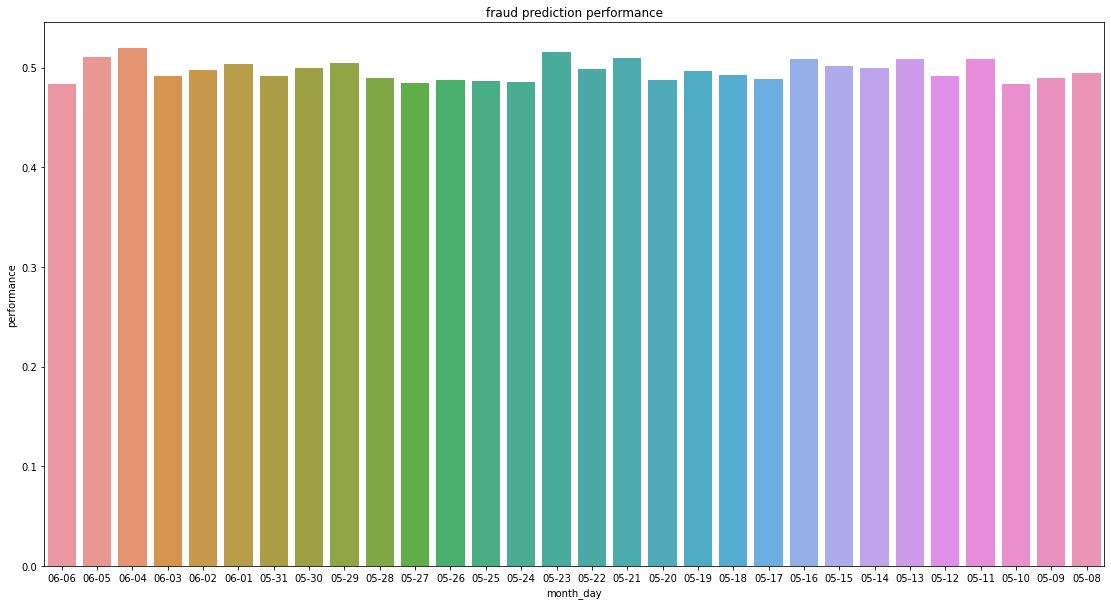

In [96]:
plt.figure(figsize=(19, 10))
plt.title('fraud prediction performance')
bar_plot = sns.barplot(x = "month_day", y = "performance", data = pred_df)

In [97]:
fig = bar_plot.get_figure()
fig.savefig("dashboard.png") 